# FORD Data Exploration
## by Vinay Kumar Reddy Levaka

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Introduction

>* Consumers can search and find bike share anywhere and sign-up for riding rewards

>* Cities, campuses, and property owners looking for bike share equipment and services can take advantage of a one stop shop for everything bike share

>* Vendors and operators can showcase products and promote their services, and brands can connect with system owners to reach millions of bike share users around the globe

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from zipfile import ZipFile

%matplotlib inline

## Data Gathering:
> The Ford Go Bike data file "201811-fordgobike-tripdata.csv.zip" is taken from url "https://s3.amazonaws.com/fordgobike-data/index.html". Download and Unzip this file manually by clicking the latest file folder in it "201811-fordgobike-tripdata.csv.zip". 

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv("201811-fordgobike-tripdata.csv")

## Data Assessing:

> After gathering the data, here I have assessed the data in visually and programatically.

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head()

(53675, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    float64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


duration_sec                start_time                  end_time  \
0         79489  2018-11-30 13:40:32.7690  2018-12-01 11:45:21.9720   
1         42847  2018-11-30 20:13:45.5090  2018-12-01 08:07:53.1330   
2          1128  2018-11-30 23:58:26.4310  2018-12-01 00:17:14.4880   
3          2476  2018-11-30 23:35:06.7230  2018-12-01 00:16:23.4740   
4          1273  2018-11-30 23:54:12.3890  2018-12-01 00:15:26.3680   

   start_station_id                                 start_station_name  \
0               NaN                                                NaN   
1              37.0                                2nd St at Folsom St   
2             249.0                          Russell St at College Ave   
3             104.0                                  4th St at 16th St   
4              44.0  Civic Center/UN Plaza BART Station (Market St ...   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.420000              -121.940000             NaN   
1               37.785000              -122.395936            30.0   
2               37.858473              -122.253253           249.0   
3               37.767045              -122.390833            15.0   
4               37.781074              -122.411738            60.0   

                                    end_station_name  end_station_latitude  \
0                                                NaN             37.410000   
1     San Francisco Caltrain (Townsend St at 4th St)             37.776598   
2                          Russell St at College Ave             37.858473   
3  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
4                               8th St at Ringold St             37.774520   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -121.940000   4105.0    Customer             1982.0   
1            -122.395282   2614.0    Customer             1992.0   
2            -122.253253   1496.0  Subscriber             1998.0   
3            -122.394203   1334.0  Subscriber             1959.0   
4            -122.409449    393.0  Subscriber             1993.0   

  member_gender bike_share_for_all_trip  
0        Female                      No  
1          Male                      No  
2          Male                     Yes  
3          Male                      No  
4        Female                     Yes

### Quality Assessment:

>1. DataType of start_time, and end_time are in object format <br>
>2. Some of the start dates are greater than end date <br>
>3. In some cases duration_sec values are matching with the difference of end_time and start_time in seconds <br>
>4. bike_id is in integer format <br>
>5. DataType of Start_station_id, and end_station_id are in float format <br>
>6. For my questions, blank rows of 'member_gender' is irrelavent


### Tidiness Assessment:
>1. Unnessary columns (start_station_latitude, start_station_longitude, end_station_latitude, and  start_station_longitude) for our analysis
>2. Users birth Year column is not useful for my analysis




## Data Cleaning:
> Cleaning the data based on our assessment.

In [4]:
# Create a Copy dataset for clening the data:
df_copy = df.copy()

### Quality:  df_copy

**Define:** 
>1. DataType of start_time, and end_time are in object format <br>
>2. Some of the start dates are greater than end date <br>
>3. In some cases duration_sec values are matching with the difference of end_time and start_time in seconds <br>
>4. bike_id is in integer format <br>
>5. DataType of Start_station_id, and end_station_id are in float format <br>
>6. For my questions, blank rows of 'member_gender' is irrelavent

**Code:**

In [5]:
#1.DataType of start_time, and end_time are in object format 
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [6]:
#2.If start dates are greater than end date then using the original duration_sec else taking the difference
#3.In some cases duration_sec values are matching with the difference of end_time and start_time in seconds

df_copy['dur']=(df_copy['end_time'] - df_copy['start_time'])*24*60*60
df_copy['dur']=df_copy['dur'].astype('timedelta64[D]').astype('int64')

def get_dur(df_copy):
    if df_copy['end_time'] <= df_copy['start_time']:
        return df_copy['duration_sec']
    else:
        return df_copy['dur']
        
    
df_copy['duration'] = df_copy.apply(get_dur, axis = 1)
df_copy = df_copy.drop(['dur','duration_sec'],axis=1)
df_copy.rename(columns={'duration':'duration_sec'},inplace=True)

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53675 entries, 0 to 53674
Data columns (total 16 columns):
start_time                 53675 non-null datetime64[ns]
end_time                   53675 non-null datetime64[ns]
start_station_id           53529 non-null float64
start_station_name         53529 non-null object
start_station_latitude     53675 non-null float64
start_station_longitude    53675 non-null float64
end_station_id             53529 non-null float64
end_station_name           53529 non-null object
end_station_latitude       53675 non-null float64
end_station_longitude      53674 non-null float64
bike_id                    53674 non-null float64
user_type                  53674 non-null object
member_birth_year          51805 non-null float64
member_gender              51805 non-null object
bike_share_for_all_trip    53674 non-null object
duration_sec               53675 non-null int64
dtypes: datetime64[ns](2), float64(8), int64(1), object(5)
memory usage: 6.6+ MB


In [8]:
df_copy.head()

start_time                end_time  start_station_id  \
0 2018-11-30 13:40:32.769 2018-12-01 11:45:21.972               NaN   
1 2018-11-30 20:13:45.509 2018-12-01 08:07:53.133              37.0   
2 2018-11-30 23:58:26.431 2018-12-01 00:17:14.488             249.0   
3 2018-11-30 23:35:06.723 2018-12-01 00:16:23.474             104.0   
4 2018-11-30 23:54:12.389 2018-12-01 00:15:26.368              44.0   

                                  start_station_name  start_station_latitude  \
0                                                NaN               37.420000   
1                                2nd St at Folsom St               37.785000   
2                          Russell St at College Ave               37.858473   
3                                  4th St at 16th St               37.767045   
4  Civic Center/UN Plaza BART Station (Market St ...               37.781074   

   start_station_longitude  end_station_id  \
0              -121.940000             NaN   
1              -122.395936            30.0   
2              -122.253253           249.0   
3              -122.390833            15.0   
4              -122.411738            60.0   

                                    end_station_name  end_station_latitude  \
0                                                NaN             37.410000   
1     San Francisco Caltrain (Townsend St at 4th St)             37.776598   
2                          Russell St at College Ave             37.858473   
3  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
4                               8th St at Ringold St             37.774520   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -121.940000   4105.0    Customer             1982.0   
1            -122.395282   2614.0    Customer             1992.0   
2            -122.253253   1496.0  Subscriber             1998.0   
3            -122.394203   1334.0  Subscriber             1959.0   
4            -122.409449    393.0  Subscriber             1993.0   

  member_gender bike_share_for_all_trip  duration_sec  
0        Female                      No         79489  
1          Male                      No         42847  
2          Male                     Yes          1128  
3          Male                      No          2476  
4        Female                     Yes          1273

In [9]:
#4.DataType of bike_id are in integer format. So, changing it to string. 
df_copy.bike_id = df_copy.bike_id.astype(str)

#5.DataType of Start_station_id, and end_station_id are in float format. So, changing it to string.
df_copy.start_station_id = df_copy.start_station_id.astype(str)
df_copy.end_station_id = df_copy.end_station_id.astype(str) 

#6. If 'member_gender' is blank then dropping it
df_copy = df_copy.loc[pd.notnull(df_copy['member_gender'])]

### Tideness:  df_copy

**Define:** 
>1. Unnessary columns (start_station_latitude, start_station_longitude, end_station_latitude, and  end_station_longitude) for our analysis. <br>
>3. Users birth Year column is not useful for my analysis. Hence, creating the Age column.

In [10]:
# 1. Dropping unnecessary columns
df_copy = df_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1)

# 2. Creating Age column (calculting age by subtracting the birth year from the current year '2019' )
df_copy['age']= 2019 - df_copy['member_birth_year']

**Test:**

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51805 entries, 0 to 53673
Data columns (total 13 columns):
start_time                 51805 non-null datetime64[ns]
end_time                   51805 non-null datetime64[ns]
start_station_id           51805 non-null object
start_station_name         51666 non-null object
end_station_id             51805 non-null object
end_station_name           51666 non-null object
bike_id                    51805 non-null object
user_type                  51805 non-null object
member_birth_year          51805 non-null float64
member_gender              51805 non-null object
bike_share_for_all_trip    51805 non-null object
duration_sec               51805 non-null int64
age                        51805 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 5.5+ MB


In [12]:
df_copy.describe()

member_birth_year  duration_sec           age
count       51805.000000  51805.000000  51805.000000
mean         1983.790059    694.450150     35.209941
std            10.496124   1576.222304     10.496124
min          1900.000000     61.000000     19.000000
25%          1978.000000    330.000000     27.000000
50%          1986.000000    515.000000     33.000000
75%          1992.000000    785.000000     41.000000
max          2000.000000  85788.000000    119.000000

In [13]:
#Copying the final data
df_copy.to_csv('201811-fordgobike-tripdata-final.csv', encoding = 'utf-8')

### What is the structure of your dataset?

In the original dataframe "df", there are 134,135 diamonds in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip). Based on my questions or requirement, I have cleaned the DataFrame and copied it as "df_copy".

**Categorical variables:** <br>
member_gender: Female, Male <br>
user_type: Customer, Subscriber <br>
bike_share_for_all_trip: Yes, No <br>

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out How much time cutomers and subscribers are spending w.r.t gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that durtion_sec is the best metric to know which users are spending more time w.r.t gender. Moreover, users are prefering to go single on a bike or sharing the ride.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration_sec. <br>
> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

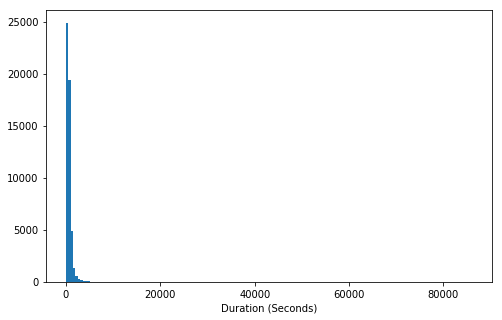

In [14]:
#### start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df_copy['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Seconds)')
plt.show()

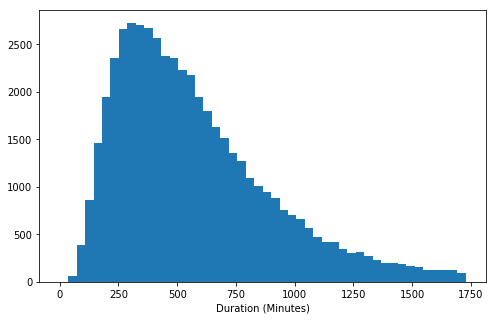

In [15]:
#### start with a standard-scaled plot
## coverting minutes to seconds
binsize = 1800
bins = 0.02*np.arange(0, df_copy['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Minutes)')
plt.show()

> Initially, when I selected the Duration in seconds, the plot was skwed and it was not clear to judge. Therefore, I have converted the duration in seconds to minutes and then it clearly shows that most of the users are spending between 200 to 800 minutes.

In [16]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = df_copy, x = 'user_type', color = default_color, ax = ax[1])
sb.countplot(data = df_copy, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])
plt.show()

> Around 0.1 million users are males and around 0.12 million user types are subscriber. Intrestingly, 0.12 million users are not sharing their bike. 

In [17]:
# investigating further on an even smaller bin size
binsize = 10
bins = np.arange(10, df_copy['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'age', bins = bins)
#plt.xlim([0.2,1.5])
plt.xlabel('age')
plt.show()

>Most of the users are in the age group of 20 to 40 years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have selected the duration_sec variable and then I have transformed the duration in seconds to minutes for a better understanding.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found that some of the values in duration_sec is not matching with the difference of Start and end time in seconds.

## Bivariate Exploration

> Here, I want to look at the pairwise correlations present between features in the data.

In [18]:
numeric_vars = ['duration_sec', 'age']
categoric_vars = ['member_gender', 'user_type','bike_share_for_all_trip']

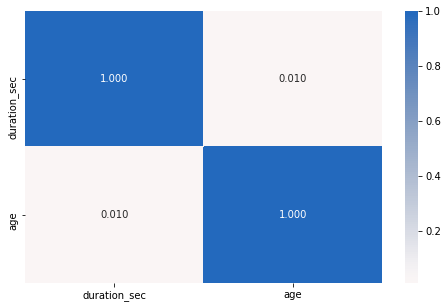

In [19]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> We can see slight positive corelation between age and duration.

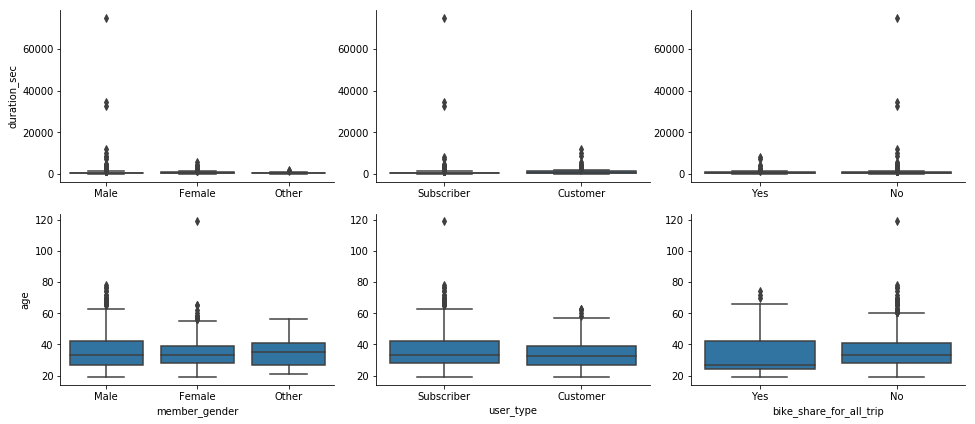

In [20]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_copy.shape[0], 2000, replace = False)
df_copy_samp = df_copy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_copy_samp, y_vars = ['duration_sec', 'age'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

>Both male & female, and users (subscribers and customers) are under the age group of around 30 years on an average. Moreover, most of the users are spending the time between 0 to 1000.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a slight positive correlation between age and duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Users sharing their bikes are mostly less than 30 years on an average!

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between Duration, gender and user type.

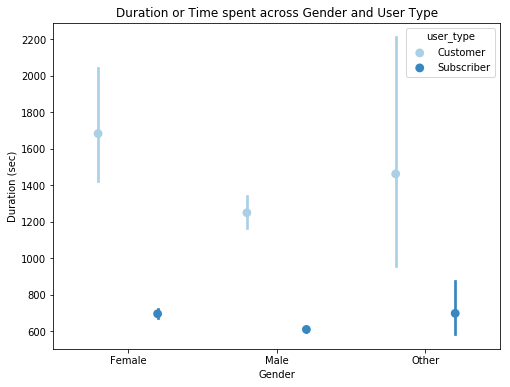

In [21]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_copy, x = 'member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration or Time spent across Gender and User Type')
plt.ylabel('Duration (sec)')
plt.xlabel('Gender')
plt.show();

In [22]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_copy, x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration or Time spent across Gender and Bike share')
plt.ylabel('Duration (sec)')
plt.xlabel('Gender')
plt.show();

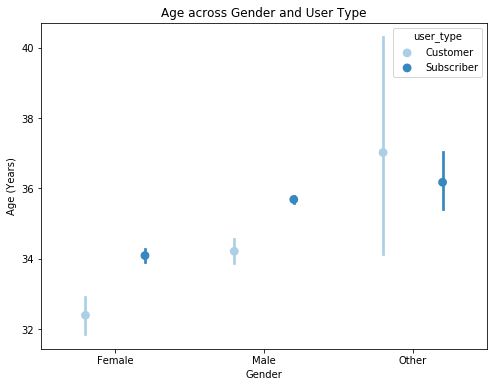

In [23]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_copy, x = 'member_gender', y = 'age', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Age across Gender and User Type')
plt.ylabel('Age (Years)')
plt.xlabel('Gender')
plt.show();

In [24]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_copy, x = 'member_gender', y = 'age', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Age across Gender and Bike share')
plt.ylabel('Age (Years)')
plt.xlabel('Gender')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Females are spending more time and most of them are customers. Moreover, females are almost spending same time with and without sharing their bikes.

### Were there any interesting or surprising interactions between features?

> Subscribers are not spending much time as compared to the customers. Female customers are lesser in their age among all. Males and Others, whose age is above 35 are not likely to share their bikes.